In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
# columnas especificadas 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
# que tamaño tienen los datos ? (filas,columnas)
train.shape

(891, 12)

In [106]:
# hay valores nulos en los datos ? 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
# como se distribuyen las variables numericas ? 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
# como se comportan las variables categoricas ? 
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [109]:
# ESTUDIO DE VARIABLES OBJECTIVOS 
# sobrevivientes 
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [110]:
# sobrevivientes vs Sexo
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


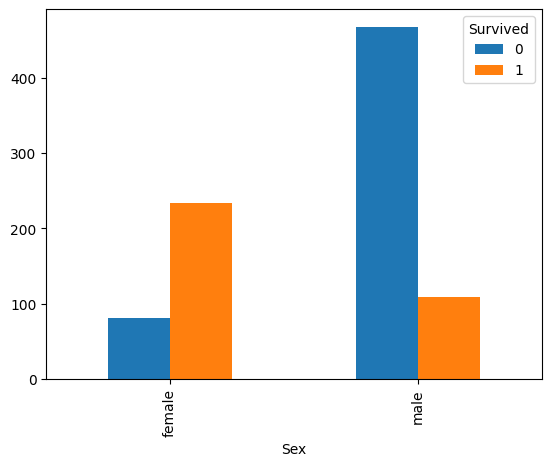

In [111]:
Group_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(Group_sex)
(Group_sex.unstack(level=0).plot.bar())
plt.show()

Axes(0.125,0.11;0.775x0.77)

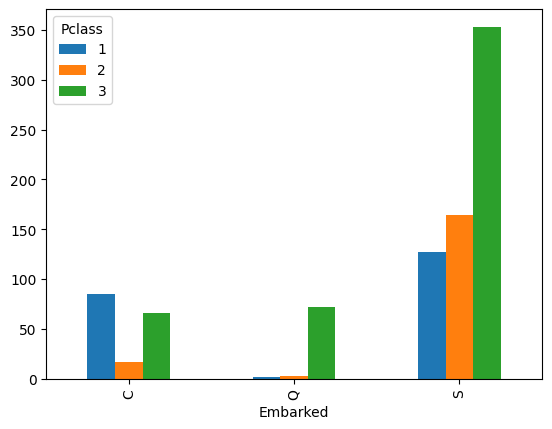

In [112]:
# sitio de embarcacion vs clase 
print(train.groupby(['Pclass','Embarked'])
      .count()['PassengerId']
      .unstack(level=0)
      .plot.bar())

In [113]:
# PROCESAMIENTO DE DATOS 
# Survived
# Sex
# Age 
# Class
train[['Survived','Sex','Age','Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [114]:
train[['Survived','Sex','Age','Pclass']].info()
# Dtype tienen que ser de tipo numerico (FLOAT OR INTEGER) para permitir graficar 
# Datos a mejorar : 
# - Datos faltantes en Age train['Age'].isna()
# la variable Sex aparece como object, la necesitamos en int o float para algoritmos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [115]:
# distribucion de nulos en Age 
(train[train['Age'].isna()]
 .groupby(['Sex','Pclass'])
 .count()['PassengerId']
 .unstack(level=0)) 

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [116]:
# familiares de las personas que no reportaron su Age
(train[train['Age'].isna()]
 .groupby(['SibSp','Parch'])
 .count()['PassengerId']
 .unstack(level=0))   
# de este consulta se puede concluir que la mayoria de personas que se desconoce su edad eran personas que viajaban solas


SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [117]:
# obtenemos la mediana de edad para de esta forma reemplazar los valores nulos 
train['Age'].median()
# se obtiene 28 al denotar anteriormente que en las graficas observamos que las personas que no reportaron su edad eran hombres que viajaban solos tiene sentido el valor obtenido en este contexto

28.0

In [118]:
# reemplazar los datos nulos 
train['Age'] = train['Age'].fillna(28.0)
train[['Survived','Sex','Age','Pclass']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [119]:
# mapeo para laber de sex
train['Sex'] = train['Sex'].map({'female':1,'male': 0}).astype(int)

In [120]:
train[['Survived','Sex','Age','Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [121]:
# Nuevas variables 
# nueva variable tipo flag pasajero que viaja solo
train['Flagsolo']=np.where((train['SibSp']==0) & (train['Parch']==0),1,0)

Survived  Flagsolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


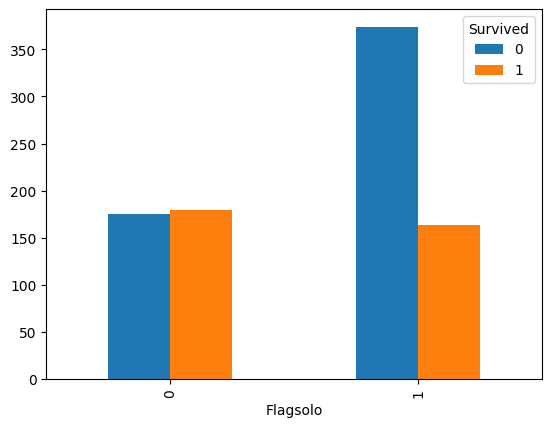

In [122]:
grouped_flag = train.groupby(['Survived','Flagsolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()
# flagsolo = 0 , no viajan solos 
# tienen igual porcentaje de supervivencia 
# flagsolo= 1 , viajan solor
# se puede inferir que tienen mas tendencia a no sobrevivir 


In [123]:
train[['Survived','Sex','Age','Pclass','Flagsolo']].head(3)

,Survived,Sex,Age,Pclass,Flagsolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [124]:
# variable independiente 
y_train = train['Survived']

# variables dependientes 
features = ['Sex','Age','Pclass','Flagsolo']
x_train = train[features]
print(y_train.shape,x_train.shape)


(891,) (891, 4)


In [125]:
# Modelos 
# Regresión logística con Python : https://cienciadedatos.net/documentos/py17-regresion-logistica-python
# Árboles de decisión con Python: regresión y clasificación: https://cienciadedatos.net/documentos/py07_arboles_decision_python

# entrenando modelo de regresion logistica 
from sklearn.linear_model import LogisticRegression 
logreg =LogisticRegression()
logreg.fit(x_train, y_train)

# entrenando modelo de arboles de decision 
from sklearn.tree import DecisionTreeClassifier
Desicion_tree = DecisionTreeClassifier()
Desicion_tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [126]:
# Evaluacion 
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo,x_train,y_train,
                                cmap=plt.cm.Blues,values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ',np.round(accuracy,2))
    plt.show

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\saaib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def conf_mat_acc(modelo, x_train, y_train):
    y_pred = modelo.predict(x_train)
    cm = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    true_pred = cm[0, 0] + cm[1, 1]
    total_data = np.sum(cm)
    accuracy = true_pred / total_data
    print('accuracy:', np.round(accuracy, 2))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.show()


accuracy: 0.79


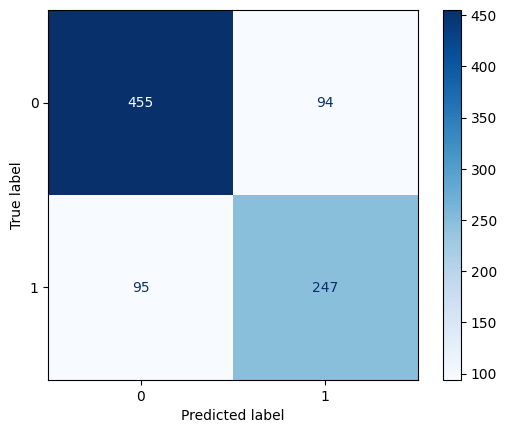

In [ ]:
# modelo de regresion logistica 
conf_mat_acc(logreg,x_train,y_train)

accuracy: 0.89


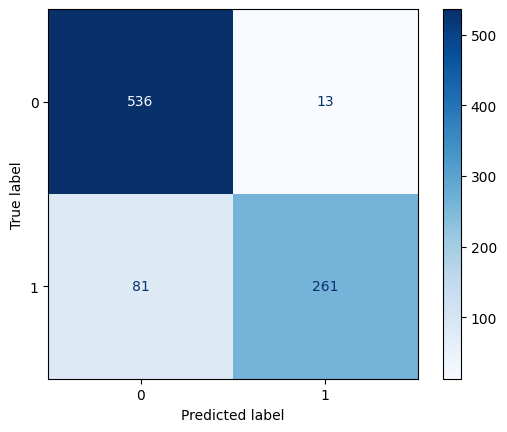

In [ ]:
# modelo de arbol de decision 
conf_mat_acc(Desicion_tree,x_train,y_train)


In [ ]:
# EVALUACION SOBRE EL TEST SET 
# Se prepara el test set para la evaluacion 
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [127]:
# procesando la informacion de test 
# hacer valores booleanos a sex 
test['Sex'] = test['Sex'].map({'female':1,'male':0}).astype(int)

# rellenar valores de Age 
test['Age'] = test['Age'].fillna(28.0)

# crear variable FlagSolo
test['Flagsolo'] = np.where((test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)


In [128]:
print(test.info())
test[features].head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Flagsolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.1+ KB
None


,Sex,Age,Pclass,Flagsolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [129]:
# crear test set 
X_test = test[features]
print(X_test.shape) 

(418, 4)


In [130]:
# prediccion de survived en test set 
y_pred_log = logreg.predict(X_test)
y_pred_tree = Desicion_tree.predict(X_test)
print(y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [131]:
# prediccion 
print(y_pred_log[0:20])
print(y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [132]:
# descargar en ordenador 
def download_output(y_pred,name):
    output = pd.DataFrame({'PassengerId':test.PassengerId,
                           'Survived': y_pred})
    output.to_csv(name,index=False)

In [133]:
download_output(y_pred_log,'SA_pred_log.csv')
download_output(y_pred_tree,'SA_pred_tree.csv')